# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [161]:
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import requests
from random import uniform

from citipy import citipy
import time

#API keys
from api_keys2 import g_key, weather_key

# Configure gmaps
gmaps.configure(api_key = g_key)

## Generate Cities List

In [80]:
# Get list of random latitudes and longitudes
lat = np.random.uniform(-90,90,1350)
lng = np.random.uniform(-180,180,1350)

In [82]:
# Zip lat & lng into tupled list
coords = list(zip(lat,lng))
len(coords)

1350

In [83]:
# Convert random coordinates into list of cities + details
# for x in coords: 
#     location = geolocator.reverse(f'{x[0]},{x[1]}')
#     time.sleep(1)
# print(location.address)
cities = []
countries = []
comma = ","
for x in coords:
    city = citipy.nearest_city(x[0], x[1])
    cities.append(city.city_name)
    countries.append(city.country_code)

# Convert list to df
df = pd.DataFrame(list(zip(cities,countries)),columns=["City","Country"])
df.count()

City       1350
Country    1350
dtype: int64

In [84]:
# Clean df of repeat cities
clean_df = df.drop_duplicates(subset="City")
clean_df.count()

City       587
Country    587
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# clean_df_5 = clean_df.head(5)
# clean_df_5

,City,Country
0,ushuaia,ar
1,nadym,ru
3,sao joao da barra,br
4,castro,cl
5,taolanaro,mg


In [86]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
cities_json = []
temps_json = []
humid_json = []
clouds_json = []
winds_json = []
lng_json = []
lat_json = []
countries_json = []
count = 1

for index,row in clean_df.iterrows():
    city = row["City"]
    query_url = weather_url + "appid=" + weather_key + "&q=" + city + "&units=" + units 
    city_count += 1
    print(f"City number {city_count} ({city}) is being processed.")  
    try:
        response = requests.get(query_url).json()
        time.sleep(1)
        temps_json.append(response["main"]["temp"])
        cities_json.append(response["name"])
        countries_json.append(response["sys"]["country"])
        humid_json.append(response["main"]["humidity"])
        clouds_json.append(response["clouds"]["all"])
        winds_json.append(response["wind"]["speed"])
        lng_json.append(response["coord"]["lon"])
        lat_json.append(response["coord"]["lat"])
    
    except:
        print(f"{city} not found")
        pass

City number 1 (cortez) is being processed.
City number 1 (rikitea) is being processed.
City number 1 (oranjemund) is being processed.
City number 1 (vaini) is being processed.
City number 1 (bardiyah) is being processed.
City number 1 (lavrentiya) is being processed.
City number 1 (talnakh) is being processed.
City number 1 (mbekenyera) is being processed.
City number 1 (cherskiy) is being processed.
City number 1 (christchurch) is being processed.
City number 1 (puerto ayora) is being processed.
City number 1 (sungaipenuh) is being processed.
City number 1 (naze) is being processed.
City number 1 (illoqqortoormiut) is being processed.
illoqqortoormiut not found
City number 1 (kisanga) is being processed.
City number 1 (chino valley) is being processed.
City number 1 (broome) is being processed.
City number 1 (nanortalik) is being processed.
nanortalik not found
City number 1 (hilo) is being processed.
City number 1 (mancio lima) is being processed.
City number 1 (khatanga) is being pr

In [89]:
weather_df = pd.DataFrame(list(zip(cities_json,countries_json,temps_json,humid_json,clouds_json,winds_json,lat_json,lng_json)),
                          columns=["City","Country","Temperature","Humidity %","Cloudiness %","Wind Speed (mph)","Latitude","Longitude"])
weather_df

,City,Country,Temperature,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Cortez,US,74.28,48,1,6.91,37.3489,-108.5859
1,Rikitea,PF,71.37,72,100,27.09,-23.1203,-134.9692
2,Oranjemund,NA,62.89,36,0,10.09,-28.5500,16.4333
3,Vaini,TO,80.76,83,40,6.91,-21.2000,-175.2000
4,Al Bardīyah,LY,75.45,84,0,11.61,31.7561,25.0865
...,...,...,...,...,...,...,...,...
536,Caconda,AO,53.08,47,4,3.69,-13.7333,15.0667
537,Maïné Soroa,NE,75.65,69,100,3.42,13.2114,12.0241
538,College,US,76.12,44,75,9.22,64.8569,-147.8028
539,Puerto Escondido,MX,80.46,80,80,4.54,15.8500,-97.0667


# json weather format
<!-- {"coord":
        {"lon":-50.0119,"lat":-24.7911},
 "weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],
 "base":"stations",
 "main":
         {"temp":284.89,
        "feels_like":284.68,
        "temp_min":284.89,
        "temp_max":284.89,
        "pressure":1020,
        "humidity":98,
        "sea_level":1020,
        "grnd_level":906},
 "visibility":10000,
 "wind":
        {"speed":1.89,
        "deg":286,
        "gust":4.07},
 "clouds":{"all":22},
 "dt":1626566362,
 "sys":
       {"country":"BR",
       "sunrise":1626516191,
       "sunset":1626554930},
 "timezone":-10800,
 "id":3466704,
 "name":"Castro",
 "cod":200} -->

In [92]:
### Convert Raw Data to DataFrame
# Display the DataFrame
weather_df = pd.DataFrame(list(zip(cities_json,countries_json,temps_json,humid_json,clouds_json,winds_json,lat_json,lng_json)),
                          columns=["City","Country","Temperature","Humidity %","Cloudiness %","Wind Speed (mph)","Latitude","Longitude"])
weather_df

,City,Country,Temperature,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Cortez,US,74.28,48,1,6.91,37.3489,-108.5859
1,Rikitea,PF,71.37,72,100,27.09,-23.1203,-134.9692
2,Oranjemund,NA,62.89,36,0,10.09,-28.5500,16.4333
3,Vaini,TO,80.76,83,40,6.91,-21.2000,-175.2000
4,Al Bardīyah,LY,75.45,84,0,11.61,31.7561,25.0865
...,...,...,...,...,...,...,...,...
536,Caconda,AO,53.08,47,4,3.69,-13.7333,15.0667
537,Maïné Soroa,NE,75.65,69,100,3.42,13.2114,12.0241
538,College,US,76.12,44,75,9.22,64.8569,-147.8028
539,Puerto Escondido,MX,80.46,80,80,4.54,15.8500,-97.0667


In [91]:
# Export the city data into a .csv.
weather_df.to_csv(r'WeatherPy_Data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,City,Country,Temperature,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
67,Abengourou,CI,68.63,100,100,1.52,6.7297,-3.4964
80,Cape Town,ZA,48.79,100,1,5.75,-33.9258,18.4232
251,Lichinga,MZ,50.09,100,75,14.97,-13.3128,35.2406
296,Arrondissement de Moulins,FR,59.74,100,48,3.69,46.5000,3.3333
323,Grindavik,IS,46.74,100,90,3.44,63.8424,-22.4338
363,Bereda,ES,61.41,100,0,0.72,43.2686,-7.5406


In [107]:
#  Get the indices of cities that have humidity over 100%.
humid_100 = weather_df.loc[weather_df["Humidity %"]>= 100,:]
humid_100.index

Int64Index([67, 80, 251, 296, 323, 363], dtype='int64')

In [112]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
labels = [67, 80, 251, 296, 323, 363]
city_data_clean = weather_df.drop(index=labels,inplace=False)
city_data_clean

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,City,Country,Temperature,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Cortez,US,74.28,48,1,6.91,37.3489,-108.5859
1,Rikitea,PF,71.37,72,100,27.09,-23.1203,-134.9692
2,Oranjemund,NA,62.89,36,0,10.09,-28.5500,16.4333
3,Vaini,TO,80.76,83,40,6.91,-21.2000,-175.2000
4,Al Bardīyah,LY,75.45,84,0,11.61,31.7561,25.0865
...,...,...,...,...,...,...,...,...
536,Caconda,AO,53.08,47,4,3.69,-13.7333,15.0667
537,Maïné Soroa,NE,75.65,69,100,3.42,13.2114,12.0241
538,College,US,76.12,44,75,9.22,64.8569,-147.8028
539,Puerto Escondido,MX,80.46,80,80,4.54,15.8500,-97.0667


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

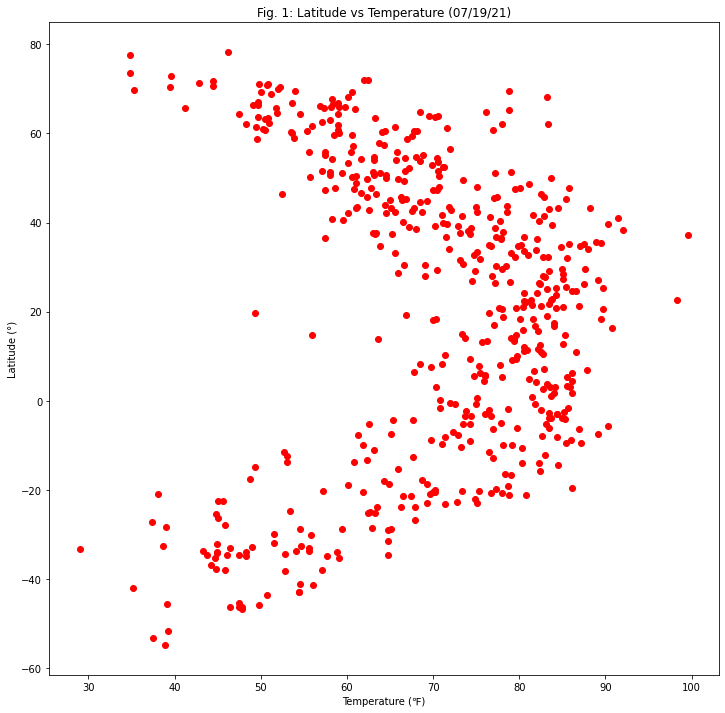

In [142]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
fig1 = plt.figure(figsize =(12, 12))

city_clean_temp = city_data_clean["Temperature"]
city_clean_temp

city_clean_lat = city_data_clean["Latitude"]
city_clean_lat

lat_temp_scatter =  plt.scatter(city_clean_temp, city_clean_lat, color="red")

plt.ylabel(u"Latitude (°)")
plt.xlabel(u"Temperature (℉)")
plt.title("Fig. 1: Latitude vs Temperature (07/19/21)")
plt.show

# Save the plotted figures as .pngs
fig1 = lat_temp_scatter.get_figure()
fig1.savefig(r'../Outputs/WeatherPy_Fig1.png')

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Temperature) axis marks the temperature of cities around the world. Traveling our y "Latitude" axis north (80) to the equator (0) then south (-60), the temperature increases and peaks around 20-0 degrees. 

#### Cities closer to the equator generally have higher temperatures. The reason temperatures peak at 20-0 degrees, insted of 0 degrees is due to the tilt of the earth's axis by about 23 degrees.

## Latitude vs. Humidity Plot

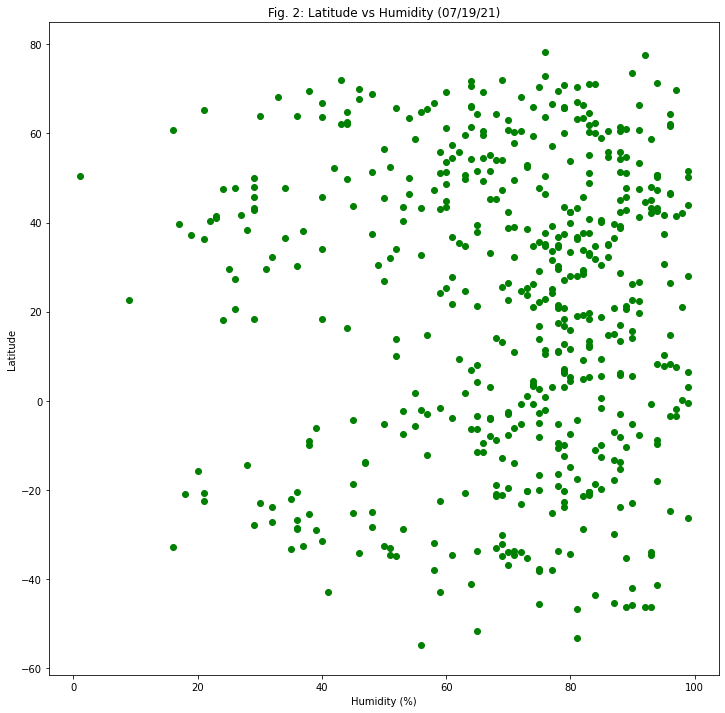

In [143]:
fig2 = plt.figure(figsize =(12, 12))

city_clean_humi = city_data_clean["Humidity %"]
city_clean_humi

city_clean_lat = city_data_clean["Latitude"]
city_clean_lat

lat_humi_scatter =  plt.scatter( city_clean_humi, city_clean_lat, color="green")

plt.ylabel("Latitude")
plt.xlabel(u"Humidity (%)")
plt.title("Fig. 2: Latitude vs Humidity (07/19/21)")
plt.show

# Save the plotted figures as .pngs
fig2 = lat_temp_scatter.get_figure()
fig2.savefig(r'../Outputs/WeatherPy_Fig2.png')

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Humidity") axis marks the amount water vapor in the air of cities around the world. Humidity is distributed across latitudes and weighted toward 80%. Cities nearest the equator (10 degrees to -10 degrees) have a less even distribution of humidity.

Humidity outliers = [19 18 23 16 20 21 21  9 21 16 21 17 22  1 23]


<function matplotlib.pyplot.show(close=None, block=None)>

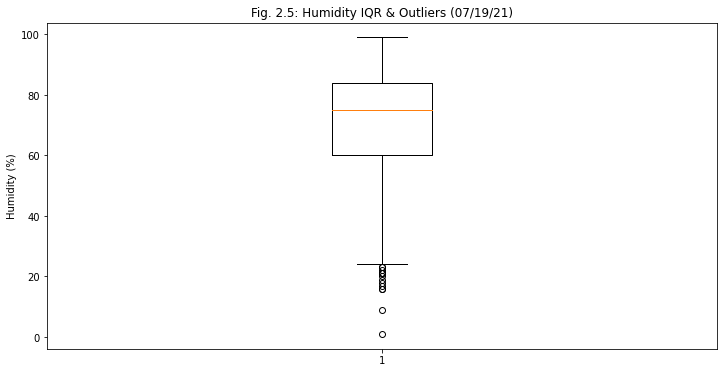

In [160]:
fig2_5 = plt.figure(figsize =(12, 6))

# city_clean_humi_dict = city_clean_humi.to_dict()
# city_clean_humi_dict

# Determine outliers using upper and lower bounds
quartiles = city_clean_humi.quantile([.25,.5,.75])
lowq = quartiles[.25]
upq = quartiles[.75]
inqr = upq - lowq
lower_bound = lowq - (1.5*inqr)
upper_bound = upq + (1.5*inqr)
outliers = city_clean_humi.loc[(city_clean_humi<lower_bound)|(city_clean_humi>upper_bound)]
print(f"Humidity outliers = {outliers.values}")

# outliers = tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]
# print(f"{drug} outliers = {outliers.values}")

plt.boxplot(city_clean_humi)

plt.ylabel(u"Humidity (%)")
# plt.xlabel(u"Humidity (%)")
plt.title("Fig. 2.5: Humidity IQR & Outliers (07/19/21)")
plt.show

# Save the plotted figures as .pngs
# fig2_5.get_figure()
# fig2_5.savefig(r'../Outputs/WeatherPy_Fig2_5.png')

## Latitude vs. Cloudiness Plot

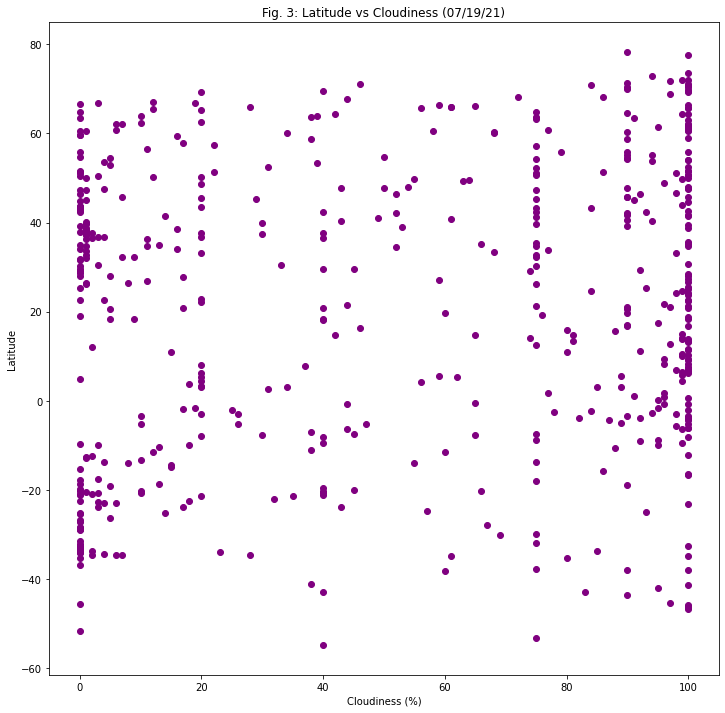

In [147]:
fig3 = plt.figure(figsize =(12, 12))

city_clean_clou = city_data_clean["Cloudiness %"]
city_clean_clou

city_clean_lat = city_data_clean["Latitude"]
city_clean_lat

lat_cloud_scatter =  plt.scatter(city_clean_clou, city_clean_lat, color="purple")

plt.ylabel("Latitude")
plt.xlabel(u"Cloudiness (%)")
plt.title("Fig. 3: Latitude vs Cloudiness (07/19/21)")
plt.show

# Save the plotted figures as .pngs
fig3 = lat_cloud_scatter.get_figure()
fig3.savefig(r'../Outputs/WeatherPy_Fig3.png')

In [ ]:
fig3_5 = plt.figure(figsize =(12, 6))

# city_clean_humi_dict = city_clean_humi.to_dict()
# city_clean_humi_dict

# Determine outliers using upper and lower bounds
quartiles = city_clean_clou.quantile([.25,.5,.75])
lowq = quartiles[.25]
upq = quartiles[.75]
inqr = upq - lowq
lower_bound = lowq - (1.5*inqr)
upper_bound = upq + (1.5*inqr)
outliers = city_clean_humi.loc[(city_clean_clou<lower_bound)|(city_clean_clou>upper_bound)]
print(f"Cloudiness outliers = {outliers.values}")

# outliers = tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]
# print(f"{drug} outliers = {outliers.values}")

plt.boxplot(city_clean_clou)

plt.ylabel(u"Humidity (%)")
# plt.xlabel(u"Humidity (%)")
plt.title("Fig. 3.5: Cloudiness IQR & Outliers (07/19/21)")
plt.show



#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Cloudiness %") axis marks the fraction of the sky obscured by clouds in cities around the world. Cloudiness is distributed across latitudes and weighted toward 80%. Cities nearest the equator (10 degrees to -10 degrees) have a less even distribution of humidity.

#### Cities closer to the equator generally have less cloudiness. The reason temperatures peak at 20-0 degrees, insted of 0 degrees is due to the tilt of the earth's axis by about 23 degrees.

## Latitude vs. Wind Speed Plot

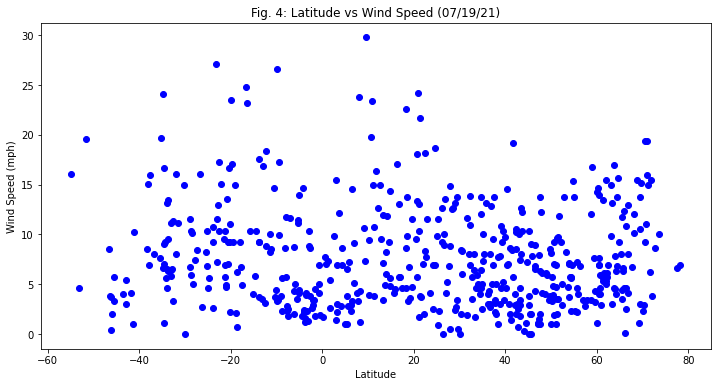

In [134]:
fig4 = plt.figure(figsize =(12, 6))

city_clean_wind = city_data_clean["Wind Speed (mph)"]
city_clean_wind

city_clean_lat = city_data_clean["Latitude"]
city_clean_lat

lat_temp_scatter =  plt.scatter(city_clean_lat, city_clean_wind, color="blue")

plt.ylabel(u"Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Fig. 4: Latitude vs Wind Speed (07/19/21)")
plt.show

# Save the plotted figures as .pngs
fig2 = lat_temp_scatter.get_figure()
fig2.savefig(r'../Outputs/WeatherPy_Fig4.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression